# Gradient Descent with SGD Regresser

## Gradient Descent

Question: What is a loss function? (Explain it in terms of the relationship between true and predicted values) 


Question: What loss functions do we know?

To solidify our knowledge of gradient descent, we will use Sklearn's stochastic gradient descent algorithm for regression [SGDRegressor](https://scikit-learn.org/stable/modules/sgd.html#regression).   Sklearn classifiers share many methods and parameters, such as fit/predict, but some have useful additions.  SGDRegressor has a new method called partial_fit, which will allow us to inspect the calculated coefficients after each step of gradient descent.  

We will use the diabetes dataset for this task.  

In [1]:
from sklearn.datasets import load_diabetes
import numpy as np

data = load_diabetes(as_frame=True)
X = data['data']
y = data['target']

In [2]:
X.shape

(442, 10)

In [3]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
from sklearn.linear_model import SGDRegressor

In [5]:
# Instantiate a SGDRegressor object and run partial fit on X and y. For now, pass the argument `penalty=None`

sgd = SGDRegressor()

sgd.partial_fit(X, y)

SGDRegressor()

In [ ]:
one_random_student(east_060721)

In [6]:
# Inspect the coefficient array
sgd.coef_

array([ 0.55565179,  0.27526143,  2.84424116,  1.98027126,  0.46340992,
        0.38725598, -1.85436269,  1.69603743,  2.27392404,  1.50736307])

In [ ]:
one_random_student(east_060721)

In [9]:
# Import mean_squared_error from metrics, and pass in the true ys, an array of predictions
# and the agrument squared = False
from sklearn.metrics import mean_squared_error

mean_squared_error(y, sgd.predict(X))

7698.561373429362

In [ ]:
one_random_student(east_060721)

In [11]:
# Repeat the partial fit. Inspect, RMSE, coefficients.
sgd.partial_fit(X,y)


SGDRegressor()

In [12]:
mean_squared_error(y, sgd.predict(X))

6167.799125843397

In [ ]:
one_random_student(east_060721)

Pick a coefficient, and explain the gradient descent update.


In [13]:
sgd.coef_

array([ 1.15922973,  0.4026839 ,  4.70706656,  3.4021882 ,  1.13821158,
        0.93816628, -3.08804196,  3.04497549,  4.06399692,  2.73522909])

In [47]:
# code
coef_0 = []
loss = []

sgd = SGDRegressor(penalty=None)
for _ in range(1000):
    sgd.partial_fit(X,y)
    coef_0.append(sgd.coef_[0])
    loss.append(mean_squared_error(y, sgd.predict(X)))

In [48]:
sgd.coef_

array([  47.91148662,  -41.91428213,  279.59739577,  193.54195462,
         32.70201575,    4.20833861, -156.96241452,  137.99246608,
        245.65226518,  133.74970027])

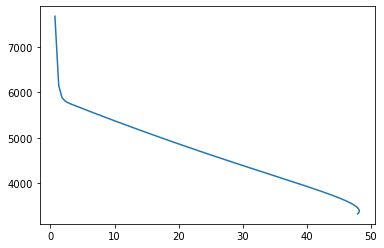

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(coef_0, loss)

In [54]:
# code
sgd.fit(X,y)

/Users/johnmaxbarry/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDRegressor(penalty=None)

In [55]:
sgd.coef_

array([  48.18937279,  -41.85666089,  279.49555857,  193.39427162,
         32.76438271,    4.05576135, -157.02602684,  138.27208358,
        245.84026655,  133.82921913])

In [37]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)
lr.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

<a id='logistic'></a>